In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
import warnings
warnings.filterwarnings('ignore')

In [3]:
df=pd.read_csv("quikr_car - quikr_car.csv")

### Quick Analysis of the data :

In [4]:
df.head()

,name,company,year,Price,kms_driven,fuel_type
0,Hyundai Santro Xing XO eRLX Euro III,Hyundai,2007,"80,000","45,000 kms",Petrol
1,Mahindra Jeep CL550 MDI,Mahindra,2006,"4,25,000",40 kms,Diesel
2,Maruti Suzuki Alto 800 Vxi,Maruti,2018,Ask For Price,"22,000 kms",Petrol
3,Hyundai Grand i10 Magna 1.2 Kappa VTVT,Hyundai,2014,"3,25,000","28,000 kms",Petrol
4,Ford EcoSport Titanium 1.5L TDCi,Ford,2014,"5,75,000","36,000 kms",Diesel


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 892 entries, 0 to 891
Data columns (total 6 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   name        892 non-null    object
 1   company     892 non-null    object
 2   year        892 non-null    object
 3   Price       892 non-null    object
 4   kms_driven  840 non-null    object
 5   fuel_type   837 non-null    object
dtypes: object(6)
memory usage: 41.9+ KB


In [6]:
df.isnull().sum()

name           0
company        0
year           0
Price          0
kms_driven    52
fuel_type     55
dtype: int64

In [7]:
df.shape

(892, 6)

In [8]:
df['name'].value_counts()

Honda City                         13
Honda Amaze                        11
Maruti Suzuki Dzire                10
Mahindra Scorpio S10                9
Maruti Suzuki Alto 800 Lxi          9
                                   ..
Mahindra Bolero DI BSII             1
Audi Q3 2.0 TDI quattro Premium     1
Skoda Superb 1.8 TFSI AT            1
BMW 5 Series 520d Sedan             1
Chevrolet Sail 1.2 LT ABS           1
Name: name, Length: 525, dtype: int64

In [9]:
df['company'].value_counts()

Maruti        235
Hyundai       145
Mahindra      100
Tata           74
Honda          61
Toyota         39
Chevrolet      35
Renault        34
Ford           31
Volkswagen     20
Skoda          13
Audi           11
Datsun          8
Mini            8
BMW             8
Nissan          6
Commercial      6
Mercedes        6
Mitsubishi      6
Force           4
Fiat            4
tata            3
Hindustan       3
I               3
MARUTI          2
urgent          2
Used            2
Jaguar          2
Sale            2
Well            1
Any             1
TATA            1
sell            1
scratch         1
9               1
7               1
all             1
Land            1
2012            1
i               1
Volvo           1
very            1
Jeep            1
Swift           1
URJENT          1
selling         1
Yamaha          1
Tara            1
Name: company, dtype: int64

In [10]:
df['year'].value_counts()

2015    117
2014     94
2013     94
2016     76
2012     75
       ... 
ture      1
emi       1
able      1
no.       1
zest      1
Name: year, Length: 61, dtype: int64

In [11]:
df['Price']

0             80,000
1           4,25,000
2      Ask For Price
3           3,25,000
4           5,75,000
           ...      
887         3,10,000
888         2,60,000
889         3,90,000
890         1,80,000
891         1,60,000
Name: Price, Length: 892, dtype: object

In [12]:
df['kms_driven'].nunique()

258

In [13]:
df['fuel_type'].value_counts()

Petrol    440
Diesel    395
LPG         2
Name: fuel_type, dtype: int64

In [14]:
df.sample(5)

,name,company,year,Price,kms_driven,fuel_type
624,Tata indigo 2017 top model..,Tata,emi,"1,70,000",NaN,NaN
676,Volkswagen Vento Comfortline Petrol,Volkswagen,2011,"2,40,000","45,933 kms",Petrol
84,Honda Brio,Honda,2012,"2,24,999","30,000 kms",Petrol
413,Mahindra Scorpio W Turbo 2.6DX 9 Seater,Mahindra,2012,"1,65,000","65,000 kms",Diesel
60,Ford Figo,Ford,2012,"1,75,000","41,000 kms",Diesel


### Observations :

    1. Car name column includes car company name.
    
    2. company names are not fully correct. There are Numeric values, Single    Letters, non-related letters in it. Example : 9,7,i,2012,URJENT,selling etc.
    
    3. year column has many non-year values and it is in Object type. Should be integer type.
    
    4. Price column has some non-price values and it is in object type. Should be integer type and the price values contains commas(,) in it.
    
    5. kms_driven should be integer and unit (kms) should not be included with the values and commas(,) should not be there in the value and there are some missing values.
    
    6. fuel_type column contains missing values.***

### Feature Engineering part_1 :

***IsNumeric*** returns *True* if the entire expression is recognized as a number; otherwise, it returns *False*. IsNumeric returns False if expression is a date expression.

In [15]:
df.shape

(892, 6)

In [16]:
df1=df[df['year'].str.isnumeric()]

In [17]:
df1.shape

(842, 6)

In [18]:
df1['year']=df1['year'].astype('int64')

In [19]:
df1['year'].dtype

dtype('int64')

In [20]:
df2=df1[df1['Price']!='Ask For Price']

In [21]:
df2.shape

(819, 6)

***Price values contains (,)s. Let's replace them with empty string and convert them into integer.***

***df2['Price'].apply(lambda a: a.replace(',',''))*** Can be done like this also..

In [22]:
df2['Price']=df2['Price'].str.replace(',','').astype('int64')

In [23]:
df2['Price'].dtype

dtype('int64')

In [24]:
df2['Price'].sample(2)

257    255000
111    325000
Name: Price, dtype: int64

In [25]:
df2['kms_driven']=df2['kms_driven'].apply(lambda a: a.split(' ')[0].replace(',',''))

In [26]:
df3=df2[df2['kms_driven'].str.isnumeric()]

In [27]:
df3['kms_driven']=df3['kms_driven'].astype('int64')

In [28]:
df3['kms_driven'].dtype

dtype('int64')

In [29]:
df3['kms_driven'].sample(2)

755    28400
372    90000
Name: kms_driven, dtype: int64

In [30]:
df3.head()

,name,company,year,Price,kms_driven,fuel_type
0,Hyundai Santro Xing XO eRLX Euro III,Hyundai,2007,80000,45000,Petrol
1,Mahindra Jeep CL550 MDI,Mahindra,2006,425000,40,Diesel
3,Hyundai Grand i10 Magna 1.2 Kappa VTVT,Hyundai,2014,325000,28000,Petrol
4,Ford EcoSport Titanium 1.5L TDCi,Ford,2014,575000,36000,Diesel
6,Ford Figo,Ford,2012,175000,41000,Diesel


In [31]:
df3.shape

(817, 6)

In [32]:
df3['fuel_type'].isnull().sum()

1

***(~)we are negeting the null values.. means we are taking those values only which are not null.***

In [33]:
df4=df3[~df3['fuel_type'].isnull()]

In [34]:
df4.shape

(816, 6)

In [35]:
df4.head()

,name,company,year,Price,kms_driven,fuel_type
0,Hyundai Santro Xing XO eRLX Euro III,Hyundai,2007,80000,45000,Petrol
1,Mahindra Jeep CL550 MDI,Mahindra,2006,425000,40,Diesel
3,Hyundai Grand i10 Magna 1.2 Kappa VTVT,Hyundai,2014,325000,28000,Petrol
4,Ford EcoSport Titanium 1.5L TDCi,Ford,2014,575000,36000,Diesel
6,Ford Figo,Ford,2012,175000,41000,Diesel


In [36]:
df4['company'].unique()

array(['Hyundai', 'Mahindra', 'Ford', 'Maruti', 'Skoda', 'Audi', 'Toyota',
       'Renault', 'Honda', 'Datsun', 'Mitsubishi', 'Tata', 'Volkswagen',
       'Chevrolet', 'Mini', 'BMW', 'Nissan', 'Hindustan', 'Fiat', 'Force',
       'Mercedes', 'Land', 'Jaguar', 'Jeep', 'Volvo'], dtype=object)

***Company name column previously had some contaminated data but after the feature engineering on other columns those values got removed.. So, no further feature engineering is needed for this column now..***

In [37]:
df4['company'].value_counts()

Maruti        221
Hyundai       139
Mahindra       98
Tata           65
Honda          60
Toyota         36
Chevrolet      34
Renault        33
Ford           30
Volkswagen     19
Skoda          13
Audi           11
Mini            8
BMW             8
Datsun          7
Mitsubishi      6
Nissan          6
Mercedes        6
Fiat            4
Force           4
Hindustan       3
Jaguar          2
Land            1
Jeep            1
Volvo           1
Name: company, dtype: int64

***Let's fetch the first 3 words of the Car Name :***

In [38]:
nam='Hyundai Santro Xing XO eRLX Euro III'

In [39]:
nam.split(' ')[:3]

['Hyundai', 'Santro', 'Xing']

In [40]:
joined_str=''
for i in nam.split(' ')[:3]:
    joined_str=joined_str+' '+i    

In [41]:
joined_str

' Hyundai Santro Xing'

In [42]:
joined_str.strip()

'Hyundai Santro Xing'

In [43]:
def concat_str(a):
    concat_string=''
    for i in a.split(' ')[:3]:
        concat_string=concat_string+' '+i
        final_str=concat_string.strip()
    return final_str

In [44]:
concat_str(nam)

'Hyundai Santro Xing'

In [45]:
df4['name']=df4['name'].apply(concat_str)

In [46]:
df4.head()

,name,company,year,Price,kms_driven,fuel_type
0,Hyundai Santro Xing,Hyundai,2007,80000,45000,Petrol
1,Mahindra Jeep CL550,Mahindra,2006,425000,40,Diesel
3,Hyundai Grand i10,Hyundai,2014,325000,28000,Petrol
4,Ford EcoSport Titanium,Ford,2014,575000,36000,Diesel
6,Ford Figo,Ford,2012,175000,41000,Diesel


***All the index values are messed up.. Let's reset the index values..***

In [47]:
df4.reset_index(drop=True,inplace=True)

In [48]:
df4.head()

,name,company,year,Price,kms_driven,fuel_type
0,Hyundai Santro Xing,Hyundai,2007,80000,45000,Petrol
1,Mahindra Jeep CL550,Mahindra,2006,425000,40,Diesel
2,Hyundai Grand i10,Hyundai,2014,325000,28000,Petrol
3,Ford EcoSport Titanium,Ford,2014,575000,36000,Diesel
4,Ford Figo,Ford,2012,175000,41000,Diesel


***We have finally cleaned the messy data..Let's take a copy of the data for further use and take a copy of the cleand data in csv format..***

In [49]:
final_df=df4.copy()

In [50]:
final_df.to_csv('cleaned_car_data.csv')

### EDA

<AxesSubplot:xlabel='Price', ylabel='Count'>

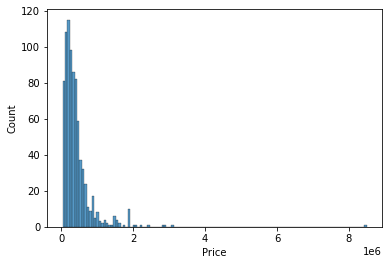

In [51]:
sns.histplot(final_df['Price'])

In [52]:
final_df['Price'].describe()

count    8.160000e+02
mean     4.117176e+05
std      4.751844e+05
min      3.000000e+04
25%      1.750000e+05
50%      2.999990e+05
75%      4.912500e+05
max      8.500003e+06
Name: Price, dtype: float64

In [53]:
final_df['Price'].quantile([.999])

0.999    4099000.555
Name: Price, dtype: float64

<AxesSubplot:xlabel='Price', ylabel='Count'>

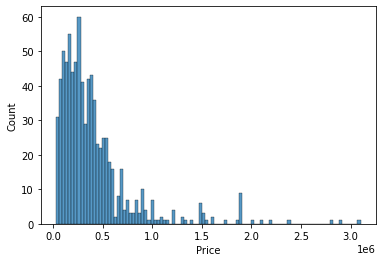

In [54]:
sns.histplot(final_df[final_df['Price']<4099000.555]['Price'],bins=100)

In [55]:
final_df.shape

(816, 6)

In [56]:
final_df.describe()

,year,Price,kms_driven
count,816.000000,8.160000e+02,816.000000
mean,2012.444853,4.117176e+05,46275.531863
std,4.002992,4.751844e+05,34297.428044
min,1995.000000,3.000000e+04,0.000000
25%,2010.000000,1.750000e+05,27000.000000
50%,2013.000000,2.999990e+05,41000.000000
75%,2015.000000,4.912500e+05,56818.500000
max,2019.000000,8.500003e+06,400000.000000


In [57]:
final_df.columns

Index(['name', 'company', 'year', 'Price', 'kms_driven', 'fuel_type'], dtype='object')

In [58]:
final_df[['name','company','fuel_type']].describe()

,name,company,fuel_type
count,816,816,816
unique,254,25,3
top,Maruti Suzuki Swift,Maruti,Petrol
freq,51,221,428


In [59]:
final_df=final_df[final_df['Price']<4099000.555]

### Let's Check the relation among the independent and dependent variable..

In [60]:
final_df.columns

Index(['name', 'company', 'year', 'Price', 'kms_driven', 'fuel_type'], dtype='object')

### name vs. Price

In [61]:
sns.set_style('darkgrid')

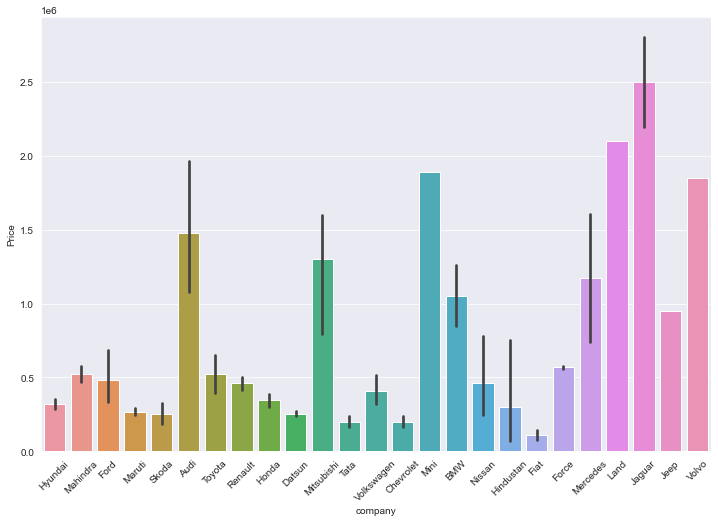

In [62]:
plt.figure(figsize=(12,8))
sns.barplot(final_df['company'],final_df['Price'])
plt.xticks(rotation=45)
plt.show()

#### Observation :
    The Most costliest car company is : Jaguar
    The cheapest car company is : Fiat

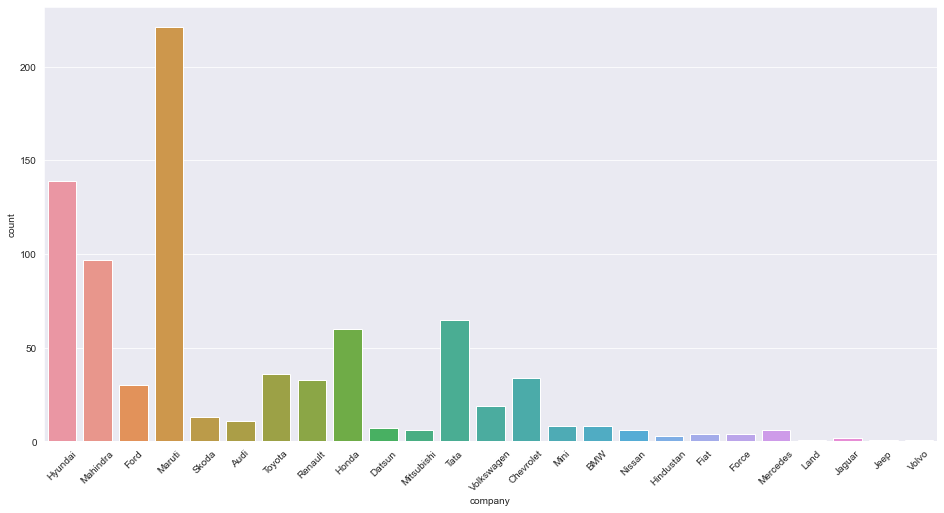

In [63]:
plt.figure(figsize=(16,8))
sns.countplot(final_df['company'])
plt.xticks(rotation=45)
plt.show()

#### Observation:
    Most of the people purchase : Maruti company's car.

### year vs. Price

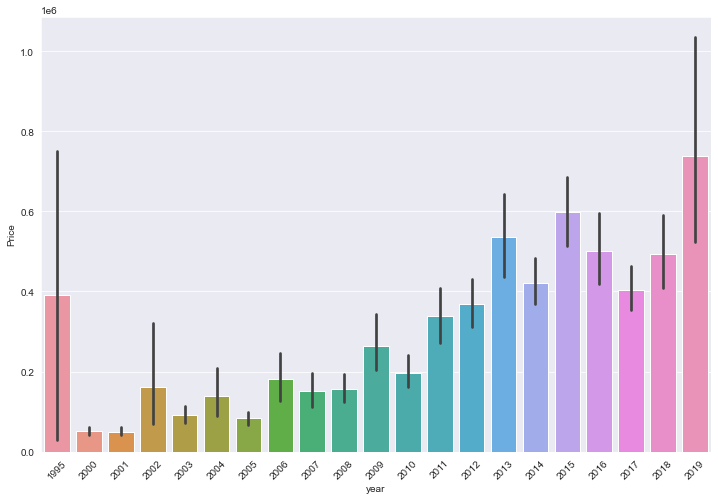

In [64]:
plt.figure(figsize=(12,8))
sns.barplot(final_df['year'],final_df['Price'])
plt.xticks(rotation=45)
plt.show()

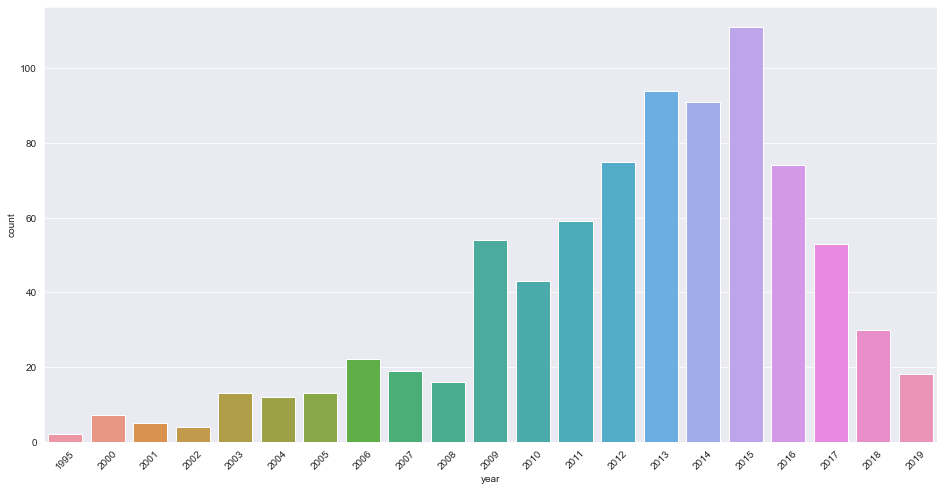

In [65]:
plt.figure(figsize=(16,8))
sns.countplot(final_df['year'])
plt.xticks(rotation=45)
plt.show()

### kms_driven vs. Price

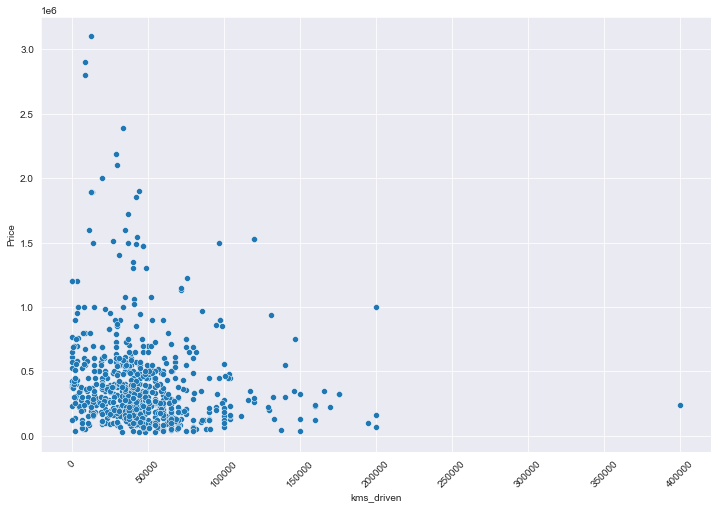

In [66]:
plt.figure(figsize=(12,8))
sns.scatterplot(final_df['kms_driven'],final_df['Price'])
plt.xticks(rotation=45)
plt.show()

### fuel_type vs Price

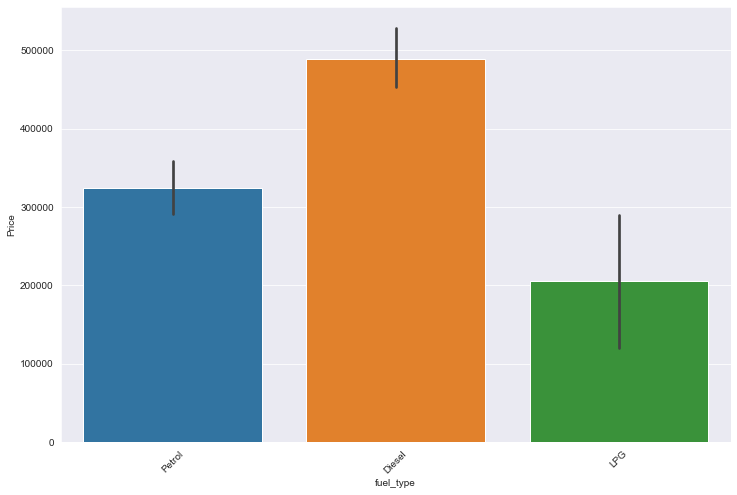

In [67]:
plt.figure(figsize=(12,8))
sns.barplot(final_df['fuel_type'],final_df['Price'])
plt.xticks(rotation=45)
plt.show()

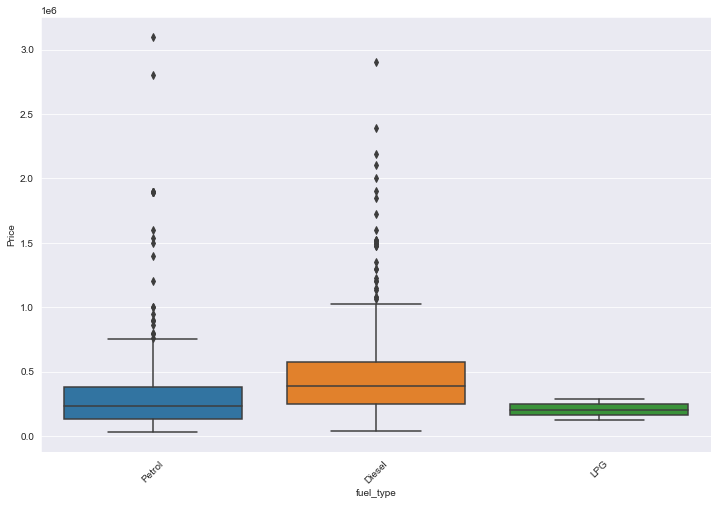

In [68]:
plt.figure(figsize=(12,8))
sns.boxplot(final_df['fuel_type'],final_df['Price'])
plt.xticks(rotation=45)
plt.show()

### Data Splitting and Model Building : 

In [69]:
final_df.columns

Index(['name', 'company', 'year', 'Price', 'kms_driven', 'fuel_type'], dtype='object')

In [70]:
X=final_df.drop(columns=['Price'],axis=1)

In [71]:
y=final_df['Price']

In [72]:
from sklearn.model_selection import train_test_split

In [73]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2,random_state=2)

### Importing different ML Algorithms and other necessary modules for the model building..

In [74]:
from sklearn.linear_model import LinearRegression,Lasso,Ridge
from sklearn.ensemble import RandomForestRegressor

In [75]:
from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import make_column_transformer
from sklearn.pipeline import make_pipeline
from sklearn.metrics import r2_score

### Let's create an OneHotEncoder Object which will contain all the categories after encoding..

In [76]:
ohe=OneHotEncoder()
ohe.fit(X[['name','company','fuel_type']])

OneHotEncoder()

In [77]:
ohe.categories_

[array(['Audi A3 Cabriolet', 'Audi A4 1.8', 'Audi A4 2.0', 'Audi A6 2.0',
        'Audi A8', 'Audi Q3 2.0', 'Audi Q5 2.0', 'Audi Q7', 'BMW 3 Series',
        'BMW 5 Series', 'BMW 7 Series', 'BMW X1', 'BMW X1 sDrive20d',
        'BMW X1 xDrive20d', 'Chevrolet Beat', 'Chevrolet Beat Diesel',
        'Chevrolet Beat LS', 'Chevrolet Beat LT', 'Chevrolet Beat PS',
        'Chevrolet Cruze LTZ', 'Chevrolet Enjoy', 'Chevrolet Enjoy 1.4',
        'Chevrolet Sail 1.2', 'Chevrolet Sail UVA', 'Chevrolet Spark',
        'Chevrolet Spark 1.0', 'Chevrolet Spark LS', 'Chevrolet Spark LT',
        'Chevrolet Tavera LS', 'Chevrolet Tavera Neo', 'Datsun GO T',
        'Datsun Go Plus', 'Datsun Redi GO', 'Fiat Linea Emotion',
        'Fiat Petra ELX', 'Fiat Punto Emotion', 'Force Motors Force',
        'Force Motors One', 'Ford EcoSport', 'Ford EcoSport Ambiente',
        'Ford EcoSport Titanium', 'Ford EcoSport Trend',
        'Ford Endeavor 4x4', 'Ford Fiesta', 'Ford Fiesta SXi', 'Ford Figo',
        '

### Let's create a column transformer to transform categorical columns into numberical columns..

In [78]:
col_transformer=make_column_transformer((OneHotEncoder(categories=ohe.categories_),['name','company','fuel_type']),
                                       remainder='passthrough')

### Let's create object of ML Algos :

In [79]:
linear=LinearRegression()
lasso=Lasso()
ridge=Ridge()
rf=RandomForestRegressor()

### Let's create pipelines :

In [80]:
pipe_linear=make_pipeline(col_transformer,linear)

In [81]:
pipe_lasso=make_pipeline(col_transformer,lasso)

In [82]:
pipe_ridge=make_pipeline(col_transformer,ridge)

In [83]:
pipe_rf=make_pipeline(col_transformer,rf)

### Let's fit the moldel :

### LinearRegression

In [84]:
pipe_linear.fit(X_train,y_train)

Pipeline(steps=[('columntransformer',
                 ColumnTransformer(remainder='passthrough',
                                   transformers=[('onehotencoder',
                                                  OneHotEncoder(categories=[array(['Audi A3 Cabriolet', 'Audi A4 1.8', 'Audi A4 2.0', 'Audi A6 2.0',
       'Audi A8', 'Audi Q3 2.0', 'Audi Q5 2.0', 'Audi Q7', 'BMW 3 Series',
       'BMW 5 Series', 'BMW 7 Series', 'BMW X1', 'BMW X1 sDrive20d',
       'BMW X1 xDrive20d', 'Chevrolet Beat', 'Chevrolet Beat...
                                                                            array(['Audi', 'BMW', 'Chevrolet', 'Datsun', 'Fiat', 'Force', 'Ford',
       'Hindustan', 'Honda', 'Hyundai', 'Jaguar', 'Jeep', 'Land',
       'Mahindra', 'Maruti', 'Mercedes', 'Mini', 'Mitsubishi', 'Nissan',
       'Renault', 'Skoda', 'Tata', 'Toyota', 'Volkswagen', 'Volvo'],
      dtype=object),
                                                                            array(['Diesel', 'LPG', 'Pe

In [85]:
linear_pred=pipe_linear.predict(X_test)

### Let's check Model's performance :

In [86]:
r2_score(y_test,linear_pred)

0.6903320946309455

### Lasso Regression

In [87]:
pipe_lasso.fit(X_train,y_train)

Pipeline(steps=[('columntransformer',
                 ColumnTransformer(remainder='passthrough',
                                   transformers=[('onehotencoder',
                                                  OneHotEncoder(categories=[array(['Audi A3 Cabriolet', 'Audi A4 1.8', 'Audi A4 2.0', 'Audi A6 2.0',
       'Audi A8', 'Audi Q3 2.0', 'Audi Q5 2.0', 'Audi Q7', 'BMW 3 Series',
       'BMW 5 Series', 'BMW 7 Series', 'BMW X1', 'BMW X1 sDrive20d',
       'BMW X1 xDrive20d', 'Chevrolet Beat', 'Chevrolet Beat...
       'Volkswagen Vento Konekt', 'Volvo S80 Summum'], dtype=object),
                                                                            array(['Audi', 'BMW', 'Chevrolet', 'Datsun', 'Fiat', 'Force', 'Ford',
       'Hindustan', 'Honda', 'Hyundai', 'Jaguar', 'Jeep', 'Land',
       'Mahindra', 'Maruti', 'Mercedes', 'Mini', 'Mitsubishi', 'Nissan',
       'Renault', 'Skoda', 'Tata', 'Toyota', 'Volkswagen', 'Volvo'],
      dtype=object),
                                 

In [88]:
lasso_pred=pipe_lasso.predict(X_test)

In [89]:
r2_score(y_test,lasso_pred)

0.6766653869491849

### Ridge Regression:

In [90]:
pipe_ridge.fit(X_train,y_train)

Pipeline(steps=[('columntransformer',
                 ColumnTransformer(remainder='passthrough',
                                   transformers=[('onehotencoder',
                                                  OneHotEncoder(categories=[array(['Audi A3 Cabriolet', 'Audi A4 1.8', 'Audi A4 2.0', 'Audi A6 2.0',
       'Audi A8', 'Audi Q3 2.0', 'Audi Q5 2.0', 'Audi Q7', 'BMW 3 Series',
       'BMW 5 Series', 'BMW 7 Series', 'BMW X1', 'BMW X1 sDrive20d',
       'BMW X1 xDrive20d', 'Chevrolet Beat', 'Chevrolet Beat...
       'Volkswagen Vento Konekt', 'Volvo S80 Summum'], dtype=object),
                                                                            array(['Audi', 'BMW', 'Chevrolet', 'Datsun', 'Fiat', 'Force', 'Ford',
       'Hindustan', 'Honda', 'Hyundai', 'Jaguar', 'Jeep', 'Land',
       'Mahindra', 'Maruti', 'Mercedes', 'Mini', 'Mitsubishi', 'Nissan',
       'Renault', 'Skoda', 'Tata', 'Toyota', 'Volkswagen', 'Volvo'],
      dtype=object),
                                 

In [91]:
ridge_pred=pipe_ridge.predict(X_test)

In [92]:
r2_score(y_test,ridge_pred)

0.03996502349404396

### RandomForest

In [93]:
pipe_rf.fit(X_train,y_train)

Pipeline(steps=[('columntransformer',
                 ColumnTransformer(remainder='passthrough',
                                   transformers=[('onehotencoder',
                                                  OneHotEncoder(categories=[array(['Audi A3 Cabriolet', 'Audi A4 1.8', 'Audi A4 2.0', 'Audi A6 2.0',
       'Audi A8', 'Audi Q3 2.0', 'Audi Q5 2.0', 'Audi Q7', 'BMW 3 Series',
       'BMW 5 Series', 'BMW 7 Series', 'BMW X1', 'BMW X1 sDrive20d',
       'BMW X1 xDrive20d', 'Chevrolet Beat', 'Chevrolet Beat...
                                                                            array(['Audi', 'BMW', 'Chevrolet', 'Datsun', 'Fiat', 'Force', 'Ford',
       'Hindustan', 'Honda', 'Hyundai', 'Jaguar', 'Jeep', 'Land',
       'Mahindra', 'Maruti', 'Mercedes', 'Mini', 'Mitsubishi', 'Nissan',
       'Renault', 'Skoda', 'Tata', 'Toyota', 'Volkswagen', 'Volvo'],
      dtype=object),
                                                                            array(['Diesel', 'LPG', 'Pe

In [94]:
rf_pred=pipe_rf.predict(X_test)

In [95]:
r2_score(y_test,rf_pred)

0.6634857230814

### Let's Try to improve the Model's Performance by finding the best random state :

In [96]:
pipe_list=[pipe_linear,pipe_lasso,pipe_ridge,pipe_rf]

In [97]:
pipe_scores=[]
for i in pipe_list:
    for j in range(1000):
        X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.1,random_state=j)
        i.fit(X_train,y_train)
        pred=i.predict(X_test)
        pipe_scores.append(r2_score(y_test,pred))

In [98]:
np.argmax(pipe_scores)

3817

In [99]:
pipe_scores[np.argmax(pipe_scores)]

0.9360592937954423

Tip :

    0-1000: linear
    1001-2000: lasso
    2001-3000: ridge
    3001-4000 :random_forest

### Conclusion : 

## Random forest is giving us the best r2_score when random_state is 817

In [100]:
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.1,random_state=817)
best_estimator=RandomForestRegressor()
best_estimator_pipe=make_pipeline(col_transformer,best_estimator)
best_estimator_pipe.fit(X_train,y_train)
y_pred=best_estimator_pipe.predict(X_test)
r2_score(y_test,y_pred)

0.9380763920515368

### Time to Dump the file :

In [101]:
import pickle

In [102]:
pickle.dump(best_estimator_pipe,open('random_model.pkl','wb'))

In [103]:
pickle.dump(final_df,open('df.pkl','wb'))

In [104]:
final_df.columns

Index(['name', 'company', 'year', 'Price', 'kms_driven', 'fuel_type'], dtype='object')

In [105]:
best_estimator_pipe.predict(X_test[:1])

array([1450599.99])

In [106]:
X_test[65:66]

,name,company,year,kms_driven,fuel_type
98,Hyundai i10 Magna,Hyundai,2014,18000,Petrol


In [107]:
y_test[65:66]

98    265000
Name: Price, dtype: int64

In [108]:
best_estimator_pipe.predict(X_test[65:66])

array([330519.65])